In [3]:
import os
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

from geotext import GeoText
import pycountry
#import geograpy

path = os.path.abspath(os.path.dirname(os.getcwd())) + '\\data'

In [89]:
info_article = pd.read_csv(path+'\\info\\info_article_o_5.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_5.csv')

In [90]:
info_article.head()

,number_volume,number_issue,number_article,type_decide,type_1,type_2,name_book,keyword,author_number,author_info,page_start,page_end,page_quant,date_receive,date_accept,date_online,views,Crossref,Web_of_Science
0,1,1,1,introduction,introduction,Introduction,Introduction,[],1,"[('Thomas P. Boje', 'male', ' Department of So...",1,7,7,NaN,NaN,21 Oct 2013,26,1,0
1,1,1,2,article,Article,Original Articles,National models for making and legitimating el...,"['business elites', 'corporate governance', 'l...",2,"[('Michel Bauer', 'male', ' Observatoire des D...",9,31,23,NaN,NaN,21 Oct 2013,78,14,0
2,1,1,3,article,Article,Original Articles,"Models of the family, women’s role and social ...","['social policy', 'family', 'women’s roles', '...",1,"[('Catherine Hakim', 'female', ' London School...",33,58,26,NaN,NaN,21 Oct 2013,441,15,0
3,1,1,4,article,Article,Original Articles,The European Union and equal opportunities pol...,"['gender', 'equal opportunities', 'European Un...",1,"[('Sylvia Walby', 'female', ' University of Le...",59,80,22,NaN,NaN,21 Oct 2013,142,13,0
4,1,1,5,article,Article,Original Articles,Private and public transfers between generatio...,"['generations', 'family', 'social policy', 'ag...",1,"[('Martin Kohli', 'male', ' Free University of...",81,104,24,NaN,NaN,21 Oct 2013,371,194,0


In [91]:
info_issue.head()

,number_volume,number_issue,article_quant,year,page_start,page_end,page_start_mod,page_end_mod,page_quant_1,page_quant_2,theme,special_1
0,1,1,7,1999,1,131,1,131,131,129,NaN,0
1,1,2,7,1999,133,318,133,318,186,183,NaN,0
2,1,3,6,1999,319,499,319,499,181,180,NaN,0
3,2,1,6,2000,1,108,1,108,108,110,NaN,0
4,2,2,5,2000,113,238,113,238,126,124,NaN,0


In [93]:
# part 1 : title analysis basic

def deal_title(i_article):
    
    title = info_article.iloc[i_article]['name_book']
    title = title.lower()
    
    title = re.sub(r'<([A-Za-z0-9/]*)>',r'',title)
    
    title = title.strip(' ')
    
    print('Number '+str(i_article)+' finished.')
    
    return title

In [94]:
for i_article in range(info_article.shape[0]):
    
    title = deal_title(i_article)
    
    info_article.loc[i_article, 'name_book'] = title
    info_article.loc[i_article, 'name_book_len'] = len(title)

Number 0 finished.
Number 1 finished.
Number 2 finished.
Number 3 finished.
Number 4 finished.
Number 5 finished.
Number 6 finished.
Number 7 finished.
Number 8 finished.
Number 9 finished.
Number 10 finished.
Number 11 finished.
Number 12 finished.
Number 13 finished.
Number 14 finished.
Number 15 finished.
Number 16 finished.
Number 17 finished.
Number 18 finished.
Number 19 finished.
Number 20 finished.
Number 21 finished.
Number 22 finished.
Number 23 finished.
Number 24 finished.
Number 25 finished.
Number 26 finished.
Number 27 finished.
Number 28 finished.
Number 29 finished.
Number 30 finished.
Number 31 finished.
Number 32 finished.
Number 33 finished.
Number 34 finished.
Number 35 finished.
Number 36 finished.
Number 37 finished.
Number 38 finished.
Number 39 finished.
Number 40 finished.
Number 41 finished.
Number 42 finished.
Number 43 finished.
Number 44 finished.
Number 45 finished.
Number 46 finished.
Number 47 finished.
Number 48 finished.
Number 49 finished.
Number 50 

Number 539 finished.
Number 540 finished.
Number 541 finished.
Number 542 finished.
Number 543 finished.
Number 544 finished.
Number 545 finished.
Number 546 finished.
Number 547 finished.
Number 548 finished.
Number 549 finished.
Number 550 finished.
Number 551 finished.
Number 552 finished.
Number 553 finished.
Number 554 finished.
Number 555 finished.
Number 556 finished.
Number 557 finished.
Number 558 finished.
Number 559 finished.
Number 560 finished.
Number 561 finished.
Number 562 finished.
Number 563 finished.
Number 564 finished.
Number 565 finished.
Number 566 finished.
Number 567 finished.
Number 568 finished.
Number 569 finished.
Number 570 finished.
Number 571 finished.
Number 572 finished.
Number 573 finished.
Number 574 finished.
Number 575 finished.
Number 576 finished.
Number 577 finished.
Number 578 finished.
Number 579 finished.
Number 580 finished.
Number 581 finished.
Number 582 finished.
Number 583 finished.
Number 584 finished.
Number 585 finished.
Number 586 fi

In [95]:
# info_article.columns.values
info_article = info_article[['number_volume', 'number_issue', 'number_article', 
                             'type_decide','type_1', 'type_2', 
                             'name_book',  'name_book_len', 'keyword', 
                             'author_number', 'author_info', 
                             'page_start', 'page_end', 'page_quant',
                             'date_receive', 'date_accept', 'date_online', 
                             'views', 'Crossref', 'Web_of_Science',]]

info_article.head()

,number_volume,number_issue,number_article,type_decide,type_1,type_2,name_book,name_book_len,keyword,author_number,author_info,page_start,page_end,page_quant,date_receive,date_accept,date_online,views,Crossref,Web_of_Science
0,1,1,1,introduction,introduction,Introduction,introduction,12.0,[],1,"[('Thomas P. Boje', 'male', ' Department of So...",1,7,7,NaN,NaN,21 Oct 2013,26,1,0
1,1,1,2,article,Article,Original Articles,national models for making and legitimating el...,50.0,"['business elites', 'corporate governance', 'l...",2,"[('Michel Bauer', 'male', ' Observatoire des D...",9,31,23,NaN,NaN,21 Oct 2013,78,14,0
2,1,1,3,article,Article,Original Articles,"models of the family, women’s role and social ...",52.0,"['social policy', 'family', 'women’s roles', '...",1,"[('Catherine Hakim', 'female', ' London School...",33,58,26,NaN,NaN,21 Oct 2013,441,15,0
3,1,1,4,article,Article,Original Articles,the european union and equal opportunities pol...,51.0,"['gender', 'equal opportunities', 'European Un...",1,"[('Sylvia Walby', 'female', ' University of Le...",59,80,22,NaN,NaN,21 Oct 2013,142,13,0
4,1,1,5,article,Article,Original Articles,private and public transfers between generatio...,82.0,"['generations', 'family', 'social policy', 'ag...",1,"[('Martin Kohli', 'male', ' Free University of...",81,104,24,NaN,NaN,21 Oct 2013,371,194,0


In [126]:
def title_analysis(info_article):
    
    title_len = info_article['name_book_len']
    
    title_min = info_article.sort_values(by='name_book_len', ascending=True).reset_index()
    title_max = info_article.sort_values(by='name_book_len', ascending=False).reset_index()
    
    print('Mean length of titles: '+str(title_len.mean())+' characters')
    print()
    
    print('Min length of titles: '+str(title_len.min())+' characters')
    print('The shortest title is: \n'+title_min.loc[0, 'name_book'])
    print('Volume No.'+str(title_min.loc[0, 'number_volume'])+
          ', Issue No.'+str(title_min.loc[0, 'number_issue'])+
          ', Article No.'+str(title_min.loc[0, 'number_article']))
    print()
    
    print('Max length of titles: '+str(title_len.max())+' characters')
    print('The longest title is: \n'+title_max.loc[0, 'name_book'])
    print('Volume No.'+str(title_max.loc[0, 'number_volume'])+
          ', Issue No.'+str(title_max.loc[0, 'number_issue'])+
          ', Article No.'+str(title_max.loc[0, 'number_article']))

In [127]:
title_analysis(info_article)

Mean length of titles: 66.1863425925926 characters

Min length of titles: 7.0 characters
The shortest title is: 
erratum
Volume No.10, Issue No.5, Article No.10

Max length of titles: 412.0 characters
The longest title is: 
cultura, lectura y deporte: percepciones, prácticas, aprendizaje y capital intercultural, encuesta nacional de cultura, lectura y deporte (los mexicanos vistos por sí mismos. los grandes temas nacionales; 13) [culture, reading and sports: perceptions, practices, learning and intercultural capital, national survey on culture, reading and sports (the mexicans viewed by themselves: the great national themes; 13)
Volume No.18, Issue No.5, Article No.8


In [128]:
info_issue.to_csv(path+'\\info\\info_issue_o_6.csv',index=False,sep=',')
info_article.to_csv(path+'\\info\\info_article_o_6.csv',index=False,sep=',')

In [ ]:
# part 2 : title analysis

info_article = pd.read_csv(path+'\\info\\info_article_o_6.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_6.csv')

In [213]:
# deal with some data first

for i_issue in range(info_issue.shape[0]):
    
    year = info_issue.iloc[i_issue]['year']
    number_issue = info_issue.iloc[i_issue]['number_issue']
    
    period = str(year)+'-'+str(number_issue)
    
    info_issue.loc[i_issue, 'period'] = period

In [220]:
# info_issue.columns.values
info_issue = info_issue[['number_volume', 'number_issue', 'article_quant', 
                         'year', 'period', 'page_start', 'page_end', 
                         'page_start_mod', 'page_end_mod',
                         'page_quant_1', 'page_quant_2', 'theme', 'special_1']]
info_issue.head()

,number_volume,number_issue,article_quant,year,period,page_start,page_end,page_start_mod,page_end_mod,page_quant_1,page_quant_2,theme,special_1
0,1,1,7,1999,1999-1,1,131,1,131,131,129,NaN,0
1,1,2,7,1999,1999-2,133,318,133,318,186,183,NaN,0
2,1,3,6,1999,1999-3,319,499,319,499,181,180,NaN,0
3,2,1,6,2000,2000-1,1,108,1,108,108,110,NaN,0
4,2,2,5,2000,2000-2,113,238,113,238,126,124,NaN,0


In [231]:
for i_article in range(info_article.shape[0]):
    
    number_volume = info_article.iloc[i_article]['number_volume']
    number_issue = info_article.iloc[i_article]['number_issue']
    
    select = info_issue[(info_issue['number_volume'] == number_volume)&
                        (info_issue['number_issue'] == number_issue)]
    
    year = select['year'].values[0]
    period = select['period'].values[0]
    
    info_article.loc[i_article, 'year'] = str(year)
    info_article.loc[i_article, 'period'] = period

In [236]:
# info_article.columns.values
info_article = info_article[['number_volume', 'number_issue', 'number_article', 
                             'year', 'period',
                             'type_decide', 'type_1', 'type_2', 
                             'name_book', 'name_book_len', 'keyword',
                             'author_number', 'author_info', 
                             'page_start', 'page_end', 'page_quant', 
                             'date_receive', 'date_accept', 'date_online',
                             'views', 'Crossref', 'Web_of_Science']]

info_article.head()

,number_volume,number_issue,number_article,year,period,type_decide,type_1,type_2,name_book,name_book_len,...,author_info,page_start,page_end,page_quant,date_receive,date_accept,date_online,views,Crossref,Web_of_Science
0,1,1,1,1999,1999-1,introduction,introduction,Introduction,introduction,12.0,...,"[('Thomas P. Boje', 'male', ' Department of So...",1,7,7,NaN,NaN,21 Oct 2013,26,1,0
1,1,1,2,1999,1999-1,article,Article,Original Articles,national models for making and legitimating el...,50.0,...,"[('Michel Bauer', 'male', ' Observatoire des D...",9,31,23,NaN,NaN,21 Oct 2013,78,14,0
2,1,1,3,1999,1999-1,article,Article,Original Articles,"models of the family, women’s role and social ...",52.0,...,"[('Catherine Hakim', 'female', ' London School...",33,58,26,NaN,NaN,21 Oct 2013,441,15,0
3,1,1,4,1999,1999-1,article,Article,Original Articles,the european union and equal opportunities pol...,51.0,...,"[('Sylvia Walby', 'female', ' University of Le...",59,80,22,NaN,NaN,21 Oct 2013,142,13,0
4,1,1,5,1999,1999-1,article,Article,Original Articles,private and public transfers between generatio...,82.0,...,"[('Martin Kohli', 'male', ' Free University of...",81,104,24,NaN,NaN,21 Oct 2013,371,194,0


In [238]:
info_issue.to_csv(path+'\\info\\info_issue_o_6.csv',index=False,sep=',')
info_article.to_csv(path+'\\info\\info_article_o_6.csv',index=False,sep=',')

In [117]:
info_article = pd.read_csv(path+'\\info\\info_article_o_6.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_6.csv')

In [118]:
info_article_0 = info_article[0:789]
info_article_1 = info_article[856:864]
info_article_S1 = info_article[789:850]
info_article_2 = info_article[850:856]
info_article = pd.concat([info_article_0, info_article_1,
                          info_article_S1, info_article_2], axis=0)

In [119]:
info_issue.to_csv(path+'\\info\\info_issue_o_6.csv',index=False,sep=',')
info_article.to_csv(path+'\\info\\info_article_o_6.csv',index=False,sep=',')

In [120]:
# show the data visually
info_article = pd.read_csv(path+'\\info\\info_article_o_6.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_6.csv')

In [145]:
def describe_pages_1(info_article):
    
    length = info_article['name_book_len']
    
    mean = length.mean()
    std = length.std()
    
    x_axis_value = info_issue['period'].values
    
    x = info_article['period'].values
    y = info_article['name_book_len'].values
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Length of Title (characters)', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-25,450)
    ax.set_xticks(range(0,len(x_axis_value),10))#， rotation=45
    # ax.set_xticklabels() 
    
    ax.hlines(mean+2*std, xmin=0, xmax=1,
              linestyle='--', linewidth=0.75, alpha=0.55, color='#1f78b4')
    
    ax.hlines(mean-2*std, xmin=0, xmax=1,
              linestyle='--', linewidth=0.75, alpha=0.55, color='#1f78b4')
    
    ax.fill_between([0,len(x_axis_value)-1],
                    mean-2*std, mean+2*std,
                    alpha=0.065, color='#1f78b4')
    
    ax.text(0, 350, 
            r'$\mu = $'+str(format(mean,'.4f'))+'\n'+
            r'$\sigma = $'+str(format(std,'.4f')))
    
    
    ax.scatter(x, y, marker='o',s=9,
               facecolors='none',edgecolors='black')

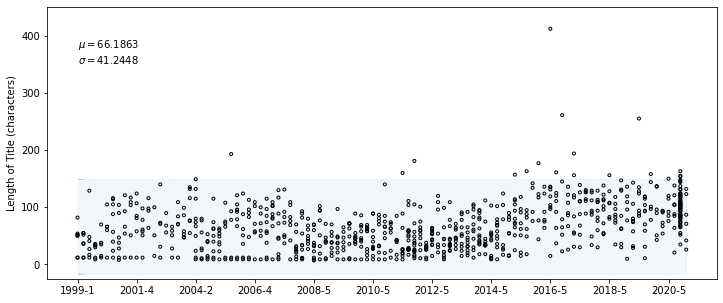

In [146]:
describe_pages_1(info_article)

In [159]:
issue_group_help_1 = info_article['name_book_len'].groupby([info_article['number_volume'], 
                                                            info_article['number_issue']]).mean()

issue_group_help_2 = info_article['name_book_len'].groupby([info_article['number_volume'], 
                                                            info_article['number_issue']]).std()

issue_group = pd.DataFrame(issue_group_help._stat_axis.values.tolist(),
                           columns = ['number_volume', 'number_issue'])

issue_group['name_book_len_mean'] = issue_group_help_1.values
issue_group['name_book_len_std'] = issue_group_help_2.values

info_issue = pd.merge(info_issue, issue_group, how = 'left')
#info_issue.columns.values
info_issue = info_issue[['number_volume', 'number_issue', 'article_quant', 
                         'year', 'period',
                         'name_book_len_mean', 'name_book_len_std',
                         'page_start', 'page_end', 'page_start_mod', 'page_end_mod',
                         'page_quant_1', 'page_quant_2', 'theme', 'special_1']]
info_issue.tail()

,number_volume,number_issue,article_quant,year,period,name_book_len_mean,name_book_len_std,page_start,page_end,page_start_mod,page_end_mod,page_quant_1,page_quant_2,theme,special_1
99,22,4,6,2020,2020-4,78.666667,16.548917,411,527,411,527,117,117,NaN,0
100,22,5,6,2020,2020-5,106.333333,27.383693,529,681,529,681,153,153,NaN,0
101,23,1,8,2021,2021-1,90.750000,36.149491,1,191,1,191,191,191,NaN,0
102,23,S1,61,2021,2021-S1,101.885246,26.535573,1,956,1,956,956,956,European Societies in the Time of the Coronavi...,1
103,23,2,6,2021,2021-2,80.166667,42.527246,193,310,193,310,118,118,NaN,0


In [160]:
info_issue.to_csv(path+'\\info\\info_issue_o_6.csv',index=False,sep=',')
info_article.to_csv(path+'\\info\\info_article_o_6.csv',index=False,sep=',')

In [164]:
info_article = pd.read_csv(path+'\\info\\info_article_o_6.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_6.csv')

In [210]:
def describe_pages_2(info_issue):
    
    x = info_issue['period'].values
    y_mean = info_issue['name_book_len_mean'].values
    y_std = info_issue['name_book_len_std'].values
    
    y = y_mean
    y_low = y_mean-2*y_std
    y_high = y_mean+2*y_std
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Average Length of Title (characters)', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-150,450)
    ax.set_xticks(range(0,len(x),10))#， rotation=45
    # ax.set_xticklabels() 
    
    ax.plot(x, y)
    ax.plot(x, y_low, color='#1f78b4', linestyle='--', linewidth=0.75, alpha=0.55)
    ax.plot(x, y_high, color='#1f78b4', linestyle='--', linewidth=0.75, alpha=0.55)
    
    ax.fill_between(x, y_low, y_high,
                    alpha=0.065, color='#1f78b4')

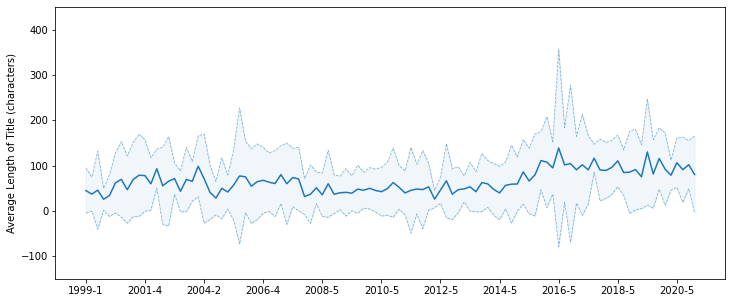

In [211]:
describe_pages_2(info_issue)